In [56]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib as plt 
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

df = pd.read_csv(r'C:\Users\alexa\OneDrive\Desktop\Accidents\RTA Dataset.csv')

In [57]:
df.head(5)

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,Defect_of_vehicle,Area_accident_occured,Lanes_or_Medians,Road_allignment,Types_of_Junction,Road_surface_type,Road_surface_conditions,Light_conditions,Weather_conditions,Type_of_collision,Number_of_vehicles_involved,Number_of_casualties,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
0,17:02:00,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Above 10yr,No defect,Residential areas,NaN,Tangent road with flat terrain,No junction,Asphalt roads,Dry,Daylight,Normal,Collision with roadside-parked vehicles,2,2,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Moving Backward,Slight Injury
1,17:02:00,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,5-10yrs,No defect,Office areas,Undivided Two way,Tangent road with flat terrain,No junction,Asphalt roads,Dry,Daylight,Normal,Vehicle with vehicle collision,2,2,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury
2,17:02:00,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,NaN,No defect,Recreational areas,other,NaN,No junction,Asphalt roads,Dry,Daylight,Normal,Collision with roadside objects,2,2,Going straight,Driver or rider,Male,31-50,3,Driver,NaN,Not a Pedestrian,Changing lane to the left,Serious Injury
3,1:06:00,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,NaN,No defect,Office areas,other,Tangent road with mild grade and flat terrain,Y Shape,Earth roads,Dry,Darkness - lights lit,Normal,Vehicle with vehicle collision,2,2,Going straight,Pedestrian,Female,18-30,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury
4,1:06:00,Sunday,18-30,Male,Junior high school,Employee,2-5yr,NaN,Owner,5-10yrs,No defect,Industrial areas,other,Tangent road with flat terrain,Y Shape,Asphalt roads,Dry,Darkness - lights lit,Normal,Vehicle with vehicle collision,2,2,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury


In [58]:
pd.set_option('display.max_columns', None)

Cleaning Data Set

In [59]:
#dropping columns 
df.drop(['Casualty_severity', 'Work_of_casuality', 'Service_year_of_vehicle', 'Defect_of_vehicle'], axis=1, inplace=True)

In [60]:
# Dropping nulls
df.isnull().sum()

Time                              0
Day_of_week                       0
Age_band_of_driver                0
Sex_of_driver                     0
Educational_level               741
Vehicle_driver_relation         579
Driving_experience              829
Type_of_vehicle                 950
Owner_of_vehicle                482
Area_accident_occured           239
Lanes_or_Medians                385
Road_allignment                 142
Types_of_Junction               887
Road_surface_type               172
Road_surface_conditions           0
Light_conditions                  0
Weather_conditions                0
Type_of_collision               155
Number_of_vehicles_involved       0
Number_of_casualties              0
Vehicle_movement                308
Casualty_class                    0
Sex_of_casualty                   0
Age_band_of_casualty              0
Fitness_of_casuality           2635
Pedestrian_movement               0
Cause_of_accident                 0
Accident_severity           

In [61]:
df = df.dropna()
print(df.shape[0])

6634


In [62]:
# rename column
df.rename(columns={"Age_band_of_driver": "Driver_age"}, inplace=True)

In [63]:
# replacing values
df.Driver_age.unique()

array(['18-30', '31-50', 'Under 18', 'Over 51', 'Unknown'], dtype=object)

In [64]:
df['Driver_age'] = df['Driver_age'].replace(['18-30', '31-50', 'Under 18', 'Over 51'], 
                                            ['Young Adults', 'Middle Age', 'Adolescent', 'Elderly'])

In [72]:
df.head(5)

,Time,Day_of_week,Driver_age,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Area_accident_occured,Lanes_or_Medians,Road_allignment,Types_of_Junction,Road_surface_type,Road_surface_conditions,Light_conditions,Weather_conditions,Type_of_collision,Number_of_vehicles_involved,Number_of_casualties,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity,Accident_count
3,1:06:00,Sunday,Young Adults,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,Office areas,other,Tangent road with mild grade and flat terrain,Y Shape,Earth roads,Dry,Darkness - lights lit,Normal,Vehicle with vehicle collision,2,2,Going straight,Pedestrian,Female,18-30,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury,1
7,17:20:00,Friday,Young Adults,Male,Junior high school,Employee,2-5yr,Automobile,Governmental,Residential areas,other,Tangent road with flat terrain,Y Shape,Asphalt roads,Dry,Daylight,Normal,Vehicle with vehicle collision,2,1,U-Turn,na,na,na,Normal,Not a Pedestrian,No priority to vehicle,Slight Injury,1
8,17:20:00,Friday,Young Adults,Male,Junior high school,Employee,Above 10yr,Lorry (41?100Q),Owner,Industrial areas,other,Tangent road with flat terrain,Y Shape,Earth roads,Dry,Daylight,Normal,Collision with roadside-parked vehicles,2,1,Going straight,Pedestrian,Male,Under 18,Normal,Crossing from driver's nearside,Changing lane to the right,Slight Injury,1
9,17:20:00,Friday,Young Adults,Male,Junior high school,Employee,1-2yr,Automobile,Owner,Residential areas,Undivided Two way,Tangent road with flat terrain,Y Shape,Asphalt roads,Dry,Daylight,Normal,Collision with roadside-parked vehicles,2,1,U-Turn,Passenger,Male,18-30,Normal,Not a Pedestrian,Moving Backward,Serious Injury,1
10,14:40:00,Saturday,Young Adults,Male,Above high school,Owner,1-2yr,Public (13?45 seats),Owner,Residential areas,other,Tangent road with flat terrain,No junction,Asphalt roads,Dry,Daylight,Normal,Collision with animals,2,1,Turnover,na,na,na,Normal,Not a Pedestrian,Changing lane to the left,Serious Injury,1


what age has the most accidents

Text(0, 0.5, 'Num of Accidents')

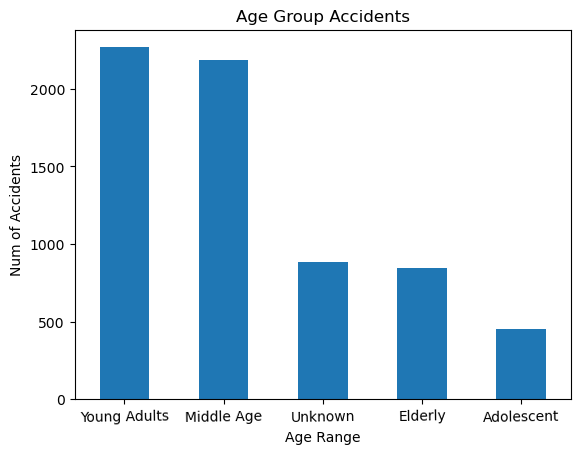

In [74]:
df['Accident_count'] = 1
age_acc = df.groupby('Driver_age')['Accident_count'].sum().round().sort_values(ascending=False)

age_acc.plot(kind="bar", title="Age Group Accidents")
plt.xticks(rotation=1, horizontalalignment="center")
plt.xlabel("Age Range")
plt.ylabel("Num of Accidents")

What gender has the most accidents

Text(0, 0.5, 'Num of Accidents')

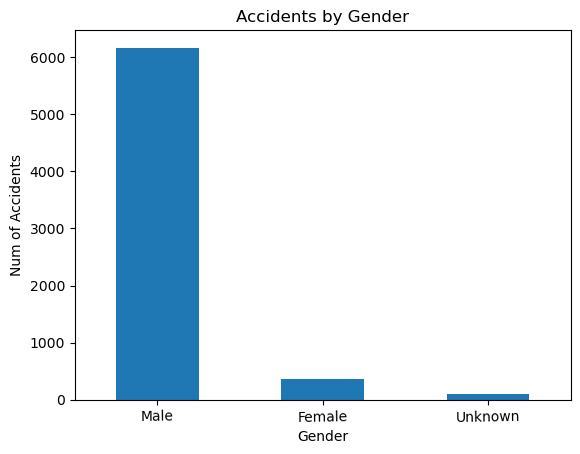

In [79]:
gender = df['Sex_of_driver'].value_counts(ascending=False)

gender.plot(kind="bar", title="Accidents by Gender")
plt.xticks(rotation=1, horizontalalignment="center")
plt.xlabel("Gender")
plt.ylabel("Num of Accidents")

Average accidents at time of day

In [81]:
df.head(5)

,Time,Day_of_week,Driver_age,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Area_accident_occured,Lanes_or_Medians,Road_allignment,Types_of_Junction,Road_surface_type,Road_surface_conditions,Light_conditions,Weather_conditions,Type_of_collision,Number_of_vehicles_involved,Number_of_casualties,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity,Accident_count
3,1:06:00,Sunday,Young Adults,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,Office areas,other,Tangent road with mild grade and flat terrain,Y Shape,Earth roads,Dry,Darkness - lights lit,Normal,Vehicle with vehicle collision,2,2,Going straight,Pedestrian,Female,18-30,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury,1
7,17:20:00,Friday,Young Adults,Male,Junior high school,Employee,2-5yr,Automobile,Governmental,Residential areas,other,Tangent road with flat terrain,Y Shape,Asphalt roads,Dry,Daylight,Normal,Vehicle with vehicle collision,2,1,U-Turn,na,na,na,Normal,Not a Pedestrian,No priority to vehicle,Slight Injury,1
8,17:20:00,Friday,Young Adults,Male,Junior high school,Employee,Above 10yr,Lorry (41?100Q),Owner,Industrial areas,other,Tangent road with flat terrain,Y Shape,Earth roads,Dry,Daylight,Normal,Collision with roadside-parked vehicles,2,1,Going straight,Pedestrian,Male,Under 18,Normal,Crossing from driver's nearside,Changing lane to the right,Slight Injury,1
9,17:20:00,Friday,Young Adults,Male,Junior high school,Employee,1-2yr,Automobile,Owner,Residential areas,Undivided Two way,Tangent road with flat terrain,Y Shape,Asphalt roads,Dry,Daylight,Normal,Collision with roadside-parked vehicles,2,1,U-Turn,Passenger,Male,18-30,Normal,Not a Pedestrian,Moving Backward,Serious Injury,1
10,14:40:00,Saturday,Young Adults,Male,Above high school,Owner,1-2yr,Public (13?45 seats),Owner,Residential areas,other,Tangent road with flat terrain,No junction,Asphalt roads,Dry,Daylight,Normal,Collision with animals,2,1,Turnover,na,na,na,Normal,Not a Pedestrian,Changing lane to the left,Serious Injury,1


Common causes of accidents

Text(0, 0.5, 'Causes')

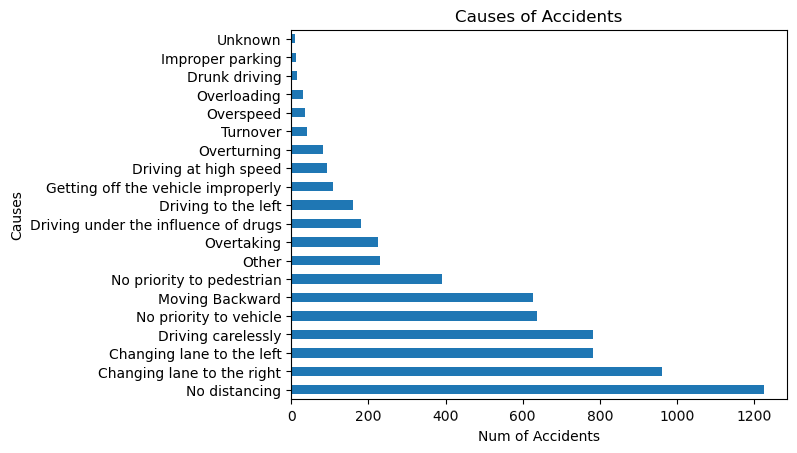

In [91]:
cause = df['Cause_of_accident'].value_counts()

cause.plot(kind="barh", title="Causes of Accidents")
plt.xticks(rotation=1, horizontalalignment="center")
plt.xlabel("Num of Accidents")
plt.ylabel("Causes")

What area averages the most amount of crashes

Text(0, 0.5, 'Area')

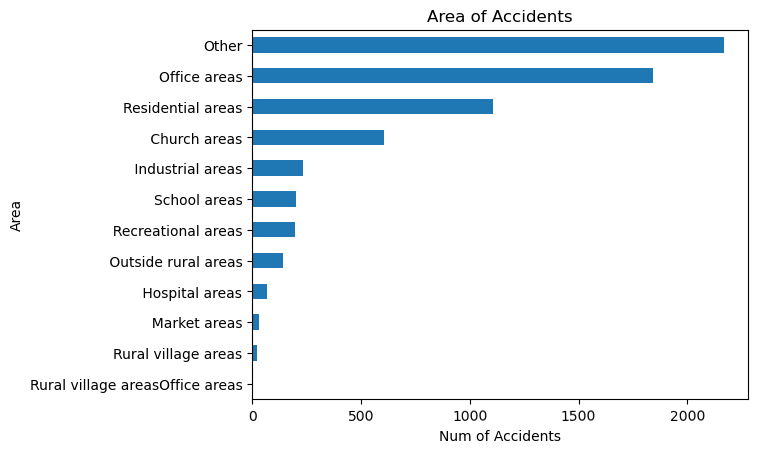

In [108]:
Area = df.groupby('Area_accident_occured')['Accident_count'].sum().round().sort_values(ascending=True)

Area.plot(kind="barh", title="Area of Accidents")
plt.xticks(rotation=1, horizontalalignment="center")
plt.xlabel("Num of Accidents")
plt.ylabel("Area")

Do people have less crashes the more experience they have

Text(0, 0.5, 'Num of Accidents')

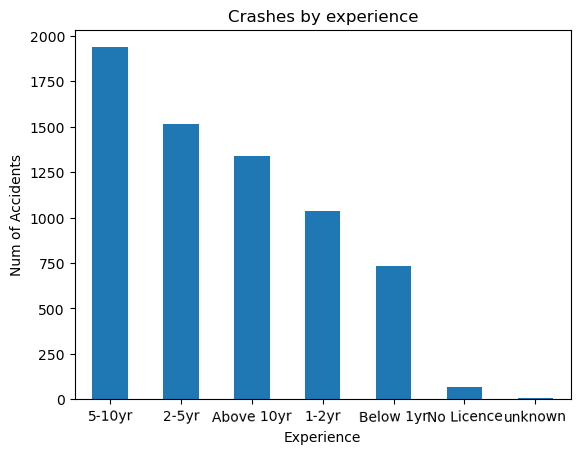

In [112]:
exp = df.groupby('Driving_experience')['Accident_count'].sum().round().sort_values(ascending=False)

exp.plot(kind="bar", title="Crashes by experience")
plt.xticks(rotation=1, horizontalalignment="center")
plt.xlabel("Experience")
plt.ylabel("Num of Accidents")